# Ejercicio 2

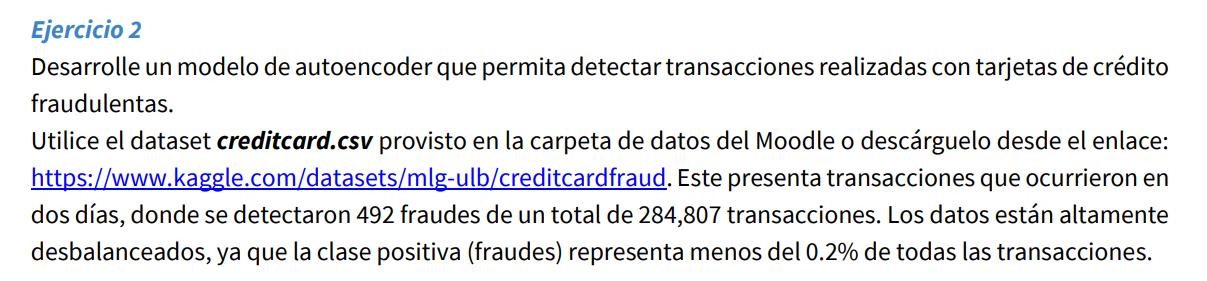

### Importe de librerias y lectura de datos

In [19]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [20]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'creditcard.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.shape

(284807, 31)

In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

### Preparacion de datos y normalizacion

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
# La variable "Tiempo" no aporta información. La eliminaremos
df.drop(['Time'], axis=1, inplace=True)

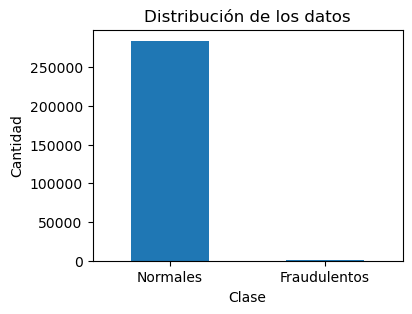

In [25]:
# 2. ANÁLISIS EXPLORATORIO DE LOS DATOS
# ===============================================
#analizo si los datos estan balanceados o no
nr_clases = df['Class'].value_counts(sort=True)
# Cantidad de registros normales vs. fraudulentos
plt.figure(figsize=(4,3))
nr_clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normales', 'Fraudulentos'])
plt.title("Distribución de los datos")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

Vemos que los datos estan super desbalanceados

In [26]:
#separo en x y en y
raw_data = df.values #se convierte en matriz
labels = raw_data[:, -1]    # Etiquetas (última columna)
data = raw_data[:, 0:-1]  # Datos 

In [27]:
#labels = labels.astype(int) # ajustas etiquetas porque tiene valores en punto flotante (0.0/1.0)

In [28]:
#separo los datos en train y test
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=1
)

In [29]:
# Normalización de datos entre 0 y 1. Los datos son lecturas de una señal acotada en intensidad
#scaler = MinMaxScaler()

#train_data = scaler.fit_transform(train_data)
#test_data = scaler.transform(test_data)

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- sacado del kaggle

In [30]:
#las transacciones fraudulentas son las que valen 1
fraud_train_data = train_data[train_labels == 1]
fraud_test_data = test_data[test_labels == 1]
#las transacciones no fraudulentas son las que valen 0
real_train_data = train_data[train_labels == 0]
real_test_data = test_data[test_labels == 0]

### Construccion del modelo

In [31]:
# codificador
encoder = tf.keras.Sequential([
    layers.Dense(20, activation="tanh"),
    layers.Dense(14, activation="relu")
    ],
    name = 'Encoder'
    )

# decodificador
decoder = tf.keras.Sequential([
    layers.Dense(20, activation="relu"),
    layers.Dense(29, activation="relu")], #darle de nuevo el mismo tamanio que tenia antes
    name = 'Decoder'
    )

In [32]:
# Modelo completo del autoencoder
inputs = tf.keras.Input(shape=(29,)) #capa de entrada
encoded = encoder(inputs) #al codificador le mando la capa de entrada
decoded = decoder(encoded) #al decodificador le mando el codificador

# Modelo que tiene dos modelos en secuencia
autoencoder = tf.keras.Model(inputs=inputs, outputs=decoded, name = 'Autoencoder')


In [39]:
#compilacion
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.01)
autoencoder.compile(optimizer='sgd', loss='mse')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │           294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 894 (3.49 KB)

 Trainable params: 894 (3.49 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 29)             │           609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 909 (3.55 KB)

 Trainable params: 909 (3.55 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Sequential)            │ (None, 14)             │           894 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ (None, 29)             │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,803 (7.04 KB)

 Trainable params: 1,803 (7.04 KB)

 Non-trainable params: 0 (0.00 B)

None


### Entrenamiento del modelo

El autoencoder lo voy a entrenar con las transacciones reales, para que cuadno le mande datos y reconstruya una distitna, el error me de alto y pueda reconocer la transaccion fraudulenta

In [40]:
#entrenamiento
history = autoencoder.fit(real_train_data, real_train_data,
    epochs=100, batch_size=32, validation_data=(test_data, test_data),
    shuffle=True
    )

Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 2419.0601 - val_loss: 2508.6990
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2321.6938 - val_loss: 2508.6990
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2413.1726 - val_loss: 2508.6990
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2506.9089 - val_loss: 2508.6990
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2345.7087 - val_loss: 2508.6990
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2303.5283 - val_loss: 2508.6990
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 2524.9590 - val_loss: 2508.6990
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2347.9199 - val_loss: 2508.6990
Epoch 9/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2354.4885 - val_loss: 2508.6990
Epoch 10/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2188.4214 - val_loss: 2508.6990
Epoch 11/100
7108/7108 ━━━━━━━━━━━━━━━━

In [43]:
reconstruccion = autoencoder.predict(test_data) #reconstruyo los datos pasados como entrada
ecm = np.mean(np.power(test_data-reconstruccion,2), axis=1)

#mae = tf.keras.losses.mae(reconstruccion, test_data) #mido q tan diferente es la reconstruccion respecto a los datos originales de entrenamiento



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


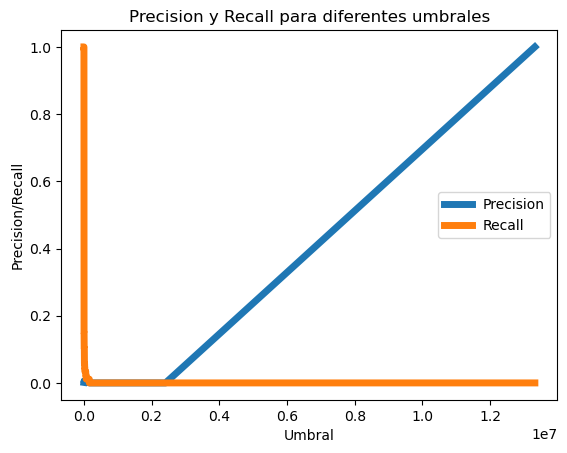

In [44]:
# Gráfica precision-recall para determinar el umbral
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
precision, recall, umbral = precision_recall_curve(test_labels, ecm)

plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [45]:
# Matriz de confusión
umbral_fijo = 0.75
Y_pred = [1 if e > umbral_fijo else 0 for e in ecm]

conf_matrix = confusion_matrix(test_labels, Y_pred)
print(conf_matrix)

report = classification_report(test_labels,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

[[ 7070 49805]
 [    0    87]]
Confusion matrix Training:
              precision    recall  f1-score   support

         0.0       1.00      0.12      0.22     56875
         1.0       0.00      1.00      0.00        87

    accuracy                           0.13     56962
   macro avg       0.50      0.56      0.11     56962
weighted avg       1.00      0.13      0.22     56962

